# House Prices Data Modeling


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

#Libraries additionally added
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import ast

# Additional Libraries
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Regular Expressions
import re

# Use the preprocessed data files
hp_train_data_path = '../2_Final_Preprocessed_Data/final_preprocessed_hp_train.csv'


# Read the House Prices Train & Test data 
hp_train_df = pd.read_csv(hp_train_data_path)

In [2]:
#Display the House Prices Train DataFrame
hp_train_df.head()

,MSZoning,LotFrontage,LotArea,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,GarageArea,SaleType,SaleCondition,SalePrice
0,RL,65,8450,CollgCr,2Story,7,2003,2003,Gd,Gd,...,3,1,8,0,Attchd,2,548,WD,Normal,208500
1,RL,80,9600,Other,1Story,6,1976,1976,TA,Gd,...,3,1,6,1,Attchd,2,460,WD,Normal,181500
2,RL,Other,11250,CollgCr,2Story,7,2001,2002,Gd,Gd,...,3,1,6,1,Attchd,2,608,WD,Normal,223500
3,RL,60,9550,Other,2Story,7,1915,1970,TA,TA,...,3,1,7,1,Detchd,3,642,WD,Abnorml,140000
4,RL,Other,14260,Other,2Story,Other,2000,2000,Gd,Gd,...,4,1,9,1,Attchd,3,836,WD,Normal,250000


## Scale the Data

In [3]:
# Identify numerical columns excluding 'SalePrice'
numerical_columns = hp_train_df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns[numerical_columns != 'SalePrice']


# Identify categorical columns excluding 'SalePrice'
categorical_columns = hp_train_df.select_dtypes(include=['object']).columns

# One-hot encode categorical columns for training data
hp_train_df = pd.get_dummies(hp_train_df, columns=categorical_columns, drop_first=True)



## Stadard Scalar

In [4]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform on training data
hp_train_df[numerical_columns] = scaler.fit_transform(hp_train_df[numerical_columns])




In [5]:
# Review the Scaled Data
hp_train_df.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.207142,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,1.107810,...,0,0,0,0,1,0,0,0,1,0
1,-0.091886,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.819964,...,0,0,0,0,1,0,0,0,1,0
2,0.073480,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,1.107810,...,0,0,0,0,1,0,0,0,1,0
3,-0.096897,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,1.107810,...,0,0,0,0,1,0,0,0,0,0
4,0.375148,0.951632,0.733308,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,1.107810,...,0,0,0,0,1,0,0,0,1,0


# Export the Scaled data to CSV 

In [6]:
hp_train_df.to_json('../3_Preprocessed_Scaled_Data/scaled_preprocessed_hp_data.json', orient='records', lines=True)
hp_train_df.to_csv('../3_Preprocessed_Scaled_Data/scaled_preprocessed_hp_data.csv', index=False)

## Split train and test data

In [7]:
# Separate target variable (Y) and features (X)
y = hp_train_df['SalePrice'] #.values.reshape(-1, 1)
X = hp_train_df.drop('SalePrice', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1168, 79)
Shape of X_test: (292, 79)
Shape of y_train: (1168,)
Shape of y_test: (292,)


# Apply RandomForestRegressor

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Assuming you have X_train and y_train prepared
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [10]:
# Assuming you've trained your model with a different name, replace 'rf_model' with the actual name
your_trained_model = RandomForestRegressor()
your_trained_model.fit(X_train, y_train)
# Use feature importance scores to select relevant features
sfm = SelectFromModel(your_trained_model, threshold=0.01)
sfm.fit(X_train, y_train)
selected_features = X_train.columns[sfm.get_support()]
# Get feature importances from the trained model
feature_importances = your_trained_model.feature_importances_
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Filter the DataFrame to include only the selected features
selected_feature_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(selected_features)]
# Print the priority or importance of the selected features
print("Priority of Selected Features:")
print(selected_feature_importance_df)



## After bin a lot of columns and eliminate necessary columns 
# we got these features

Priority of Selected Features:
              Feature  Importance
17         GarageCars    0.276558
39       ExterQual_TA    0.123681
8            2ndFlrSF    0.070270
7            1stFlrSF    0.059109
1           YearBuilt    0.058225
6         TotalBsmtSF    0.055493
11           FullBath    0.054963
3          BsmtFinSF1    0.039971
36  OverallQual_Other    0.039039
0             LotArea    0.033635
18         GarageArea    0.030190
2        YearRemodAdd    0.027430
15       TotRmsAbvGrd    0.025163
16         Fireplaces    0.022151
5           BsmtUnfSF    0.011133
38       ExterQual_Gd    0.005832


In [39]:
your_trained_model.feature_importances_

array([3.36347663e-02, 5.82253549e-02, 2.74302854e-02, 3.99705814e-02,
       9.63527286e-04, 1.11333663e-02, 5.54927248e-02, 5.91094100e-02,
       7.02703871e-02, 2.53916704e-03, 2.38564273e-04, 5.49630107e-02,
       4.01567459e-03, 6.97948057e-03, 3.19818676e-03, 2.51633336e-02,
       2.21511912e-02, 2.76558421e-01, 3.01901985e-02, 2.28605643e-04,
       7.34232387e-05, 1.11211654e-03, 1.25344113e-03, 1.32517575e-04,
       1.82230319e-04, 2.13060658e-04, 4.25888098e-04, 9.36823912e-04,
       1.04912871e-03, 4.26030555e-04, 9.91895284e-04, 3.45306035e-03,
       1.16724850e-03, 5.37165647e-04, 1.35318987e-03, 3.53482007e-03,
       3.90388788e-02, 4.17128359e-04, 5.83228902e-03, 1.23680874e-01,
       2.55850415e-04, 8.78412970e-03, 7.27861114e-05, 2.15178321e-03,
       2.05248744e-03, 7.14545115e-04, 1.57795544e-03, 1.19538040e-04,
       3.33082016e-04, 1.27547152e-03, 2.46414160e-04, 7.61786449e-05,
       2.41499669e-04, 6.38795326e-04, 2.32520449e-04, 9.25073741e-05,
      

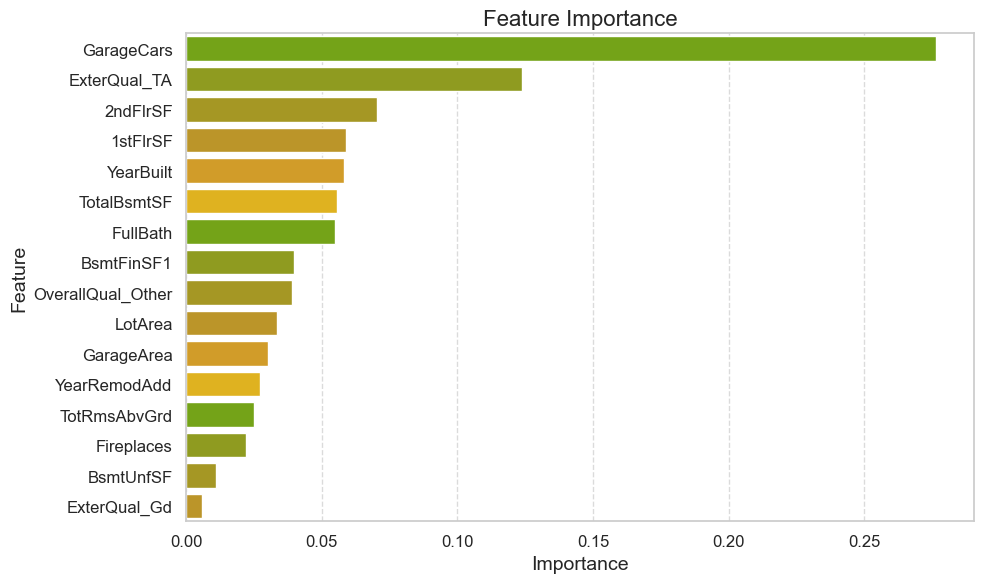

In [46]:
# Define custom color palette with shades of green and gold
custom_palette = ["#7CBA01", "#9FAF0B", "#BBA80E", "#D3A111", "#EDA60D", "#FFC300"]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot with the custom color palette
sns.barplot(x='Importance', y='Feature', data=selected_feature_importance_df, palette=custom_palette)

# Set title and labels
ax.set_title("Feature Importance", fontsize=16)
ax.set_xlabel("Importance", fontsize=14)
ax.set_ylabel("Feature", fontsize=14)

# Customize ticks and grid lines
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [11]:

#Selected features before binning when have 81 columns and then 290 after get_dummies

# Selected Features:
# Index(['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
#        '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea'],
#       dtype='object')

## Create a Linear Regression Model

In [12]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
X_train

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,-0.212153,-0.472560,-1.350194,1.049169,-0.288653,-0.396727,0.585036,0.391697,-0.795163,1.107810,...,0,0,0,0,1,0,0,0,1,0
1066,-0.268578,0.719786,0.442586,-0.973018,-0.288653,0.524681,-0.589275,-0.940928,0.973941,-0.819964,...,0,0,0,0,1,0,0,0,1,0
638,-0.174369,-2.029235,-1.689368,-0.973018,-0.288653,0.517889,-0.596115,-0.948691,-0.795163,-0.819964,...,0,0,0,0,1,0,0,0,1,0
799,-0.332419,-1.134975,-1.689368,0.274948,-0.288653,-0.917424,-0.744329,-0.469981,1.008315,1.107810,...,0,0,0,0,1,0,0,0,1,0
380,-0.552908,-1.565545,-1.689368,-0.494887,-0.288653,0.545056,-0.071666,-0.353538,0.728742,-0.819964,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.120249,1.150356,1.024029,-0.920380,-0.288653,1.636256,0.585036,0.391697,-0.795163,-0.819964,...,0,0,0,0,1,0,0,0,1,0
1130,-0.271885,-1.433062,-1.689368,0.391191,-0.288653,-0.152226,0.147235,0.427923,0.701243,1.107810,...,0,0,0,0,1,0,0,0,1,0
1294,-0.235003,-0.538802,0.248772,-0.606743,-0.288653,0.293763,-0.441061,-0.772733,-0.795163,1.107810,...,0,0,0,0,1,0,0,0,1,0
860,-0.288121,-1.764269,0.636400,-0.973018,-0.288653,0.780501,-0.331610,-0.648527,0.382712,-0.819964,...,0,0,0,0,1,0,0,0,1,0


In [37]:
# Make predictions
price_predictions = model.predict(X_test)


In [15]:
price_predictions

array([ 1.41209714e+05,  3.43579265e+05,  1.16072822e+05,  1.71872734e+05,
        3.15193572e+05,  7.91580676e+04,  2.33236551e+05,  1.65493487e+05,
        8.25070676e+04,  1.13896431e+05,  1.35154527e+05,  1.15955788e+05,
        1.17135543e+05,  2.11231465e+05,  1.69602542e+05,  1.31525140e+05,
        2.02013318e+05,  1.29906402e+05,  1.03917953e+05,  2.10283137e+05,
        1.96533547e+05,  2.04845195e+05,  1.93790597e+05,  1.18427931e+05,
        2.03903283e+05,  1.80156571e+05,  2.05168457e+05,  1.33166247e+05,
        1.76117269e+05,  2.37817310e+05,  1.30245049e+05,  2.55778863e+05,
        2.28735082e+05,  1.11719450e+05,  2.66320355e+05,  1.28579759e+05,
        1.67139397e+05,  2.03552183e+05,  2.99707372e+05,  7.08421045e+04,
        9.57604403e+04,  2.49998877e+05,  1.03781242e+05,  3.43713390e+05,
        1.32712604e+05,  1.51005341e+05,  9.91843703e+04,  1.21228757e+05,
        3.50930728e+05,  1.45392104e+05,  1.06424497e+05,  2.03250936e+05,
        1.13566361e+05,  

In [17]:
# Check the length of price_predictions and hp_train_df
print("Length of price_predictions:", len(price_predictions))
print("Number of rows in hp_train_df:", len(hp_train_df))


Length of price_predictions: 292
Number of rows in hp_train_df: 1460


In [27]:
# Display the first 292 rows of hp_train_df
hp_train_subset = hp_train_df.head(292)

# Create a copy of the original data
hp_predicted_df = hp_train_subset.copy()

# Add a column with the predicted  values
hp_predicted_df["Predicted House Price"] = price_predictions

# Display sample data
hp_predicted_df.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Predicted House Price
0,-0.207142,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,1.107810,...,0,0,0,1,0,0,0,1,0,141209.713966
1,-0.091886,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.819964,...,0,0,0,1,0,0,0,1,0,343579.265109
2,0.073480,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,1.107810,...,0,0,0,1,0,0,0,1,0,116072.822423
3,-0.096897,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,1.107810,...,0,0,0,1,0,0,0,0,0,171872.734377
4,0.375148,0.951632,0.733308,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,1.107810,...,0,0,0,1,0,0,0,1,0,315193.571729


In [32]:
# Review the predicted values form the dataFrame
hp_predicted_df["Predicted House Price"].head(10)


0    141209.713966
1    343579.265109
2    116072.822423
3    171872.734377
4    315193.571729
5     79158.067639
6    233236.551258
7    165493.487387
8     82507.067639
9    113896.430948
Name: Predicted House Price, dtype: float64

## Linear Regression Model Assessment

In [33]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y_test, price_predictions)
mse = mean_squared_error( y_test,price_predictions )
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is -4.8401097389015605e+19.
The r2 is -1.9898468480088746e+20.
The mean squared error is 1.5262774426571168e+30.
The root mean squared error is 1235426016666767.8.
The standard deviation is 79415.29188606751.
